In [174]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
train = pd.DataFrame(pd.read_csv("/content/drive/My Drive/Datasets/Stock Prices/Amazon stock prices/AMZNtrain.csv"))

In [177]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,398.799988,399.359985,394.019989,397.970001,397.970001,2137800
1,2014-01-03,398.290009,402.709991,396.220001,396.440002,396.440002,2210200
2,2014-01-06,395.850006,397.000000,388.420013,393.630005,393.630005,3170600
3,2014-01-07,395.040009,398.470001,394.290009,398.029999,398.029999,1916000
4,2014-01-08,398.470001,403.000000,396.040009,401.920013,401.920013,2316500


In [178]:
train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2018-12-24,1346.000000,1396.030029,1307.000000,1343.959961,1343.959961,7220000
1254,2018-12-26,1368.890015,1473.160034,1363.010010,1470.900024,1470.900024,10411800
1255,2018-12-27,1454.199951,1469.000000,1390.310059,1461.640015,1461.640015,9722000
1256,2018-12-28,1473.349976,1513.469971,1449.000000,1478.020020,1478.020020,8829000
1257,2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500


In [179]:
print("The shape of training data = {}".format(train.shape))

The shape of training data = (1258, 7)


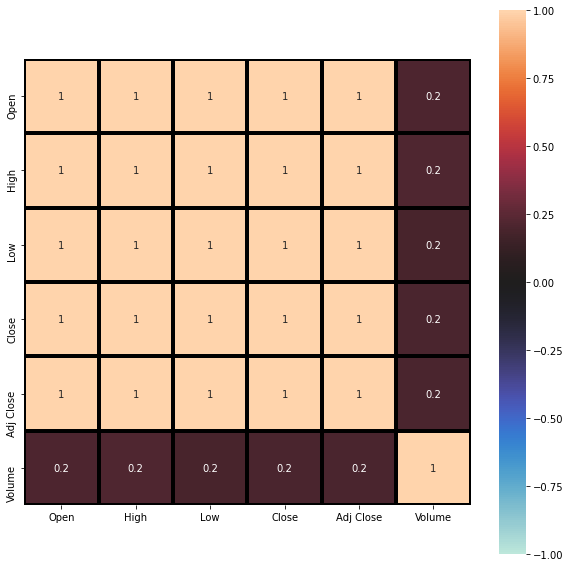

In [180]:
plt.figure(figsize = (10, 10))
sns.heatmap(train.corr(), annot = True, fmt = ".1g", vmin = -1, vmax = 1, center = 0, linewidths = 3, linecolor = "black", square = True)

In [181]:
train.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,823.840056,831.762583,814.173943,823.256543,823.256543,4.231814e+06
std,477.931392,482.851261,471.058235,476.952699,476.952699,2.400533e+06
min,284.399994,290.420013,284.000000,286.950012,286.950012,1.093000e+06
25%,393.892494,398.795006,388.427513,394.772492,394.772492,2.713950e+06
50%,726.450012,729.779999,720.079986,727.190002,727.190002,3.582300e+06
75%,1005.860016,1009.742493,997.122513,1002.762496,1002.762496,4.857900e+06
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,2.385610e+07


In [182]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


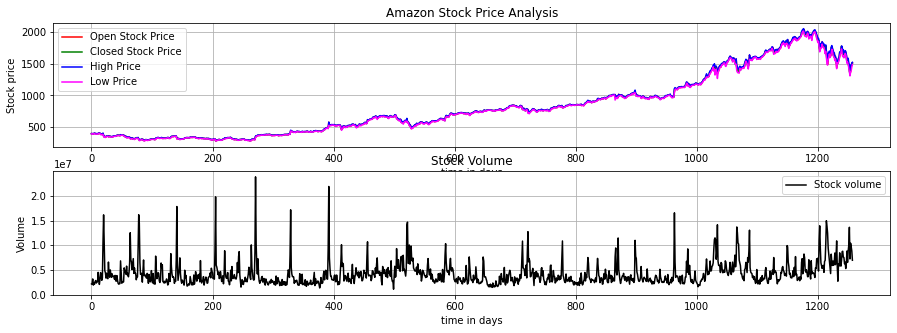

In [183]:
plt.figure(figsize = (15, 5))
plt.subplot(2,1,1)
plt.plot(train.Open.values, color = "red", label = "Open Stock Price")
plt.plot(train.Close.values, color = "green", label = "Closed Stock Price")
plt.plot(train.High.values, color = "blue", label = "High Price")
plt.plot(train.Low.values, color = "magenta", label = "Low Price")
plt.title("Amazon Stock Price Analysis")
plt.xlabel("time in days")
plt.ylabel("Stock price")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")

plt.subplot(2,1,2)
plt.plot(train.Volume.values, color= "black", label = "Stock volume")
plt.title("Stock Volume")
plt.xlabel("time in days")
plt.ylabel("Volume")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")
plt.show()

In [0]:
train.drop(["Volume","Date", "Adj Close", "High", "Low", "Close"], axis = 1, inplace = True)

In [0]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_columns(df):
  scaler = MinMaxScaler(feature_range = (0,1))
  df = scaler.fit_transform(df)
  return df  

In [0]:
train_scaled = scale_columns(train)

In [187]:
train_scaled

array([[0.06523313],
       [0.06494233],
       [0.06355099],
       ...,
       [0.66704299],
       [0.67796271],
       [0.69931748]])

In [188]:
train_scaled.shape

(1258, 1)

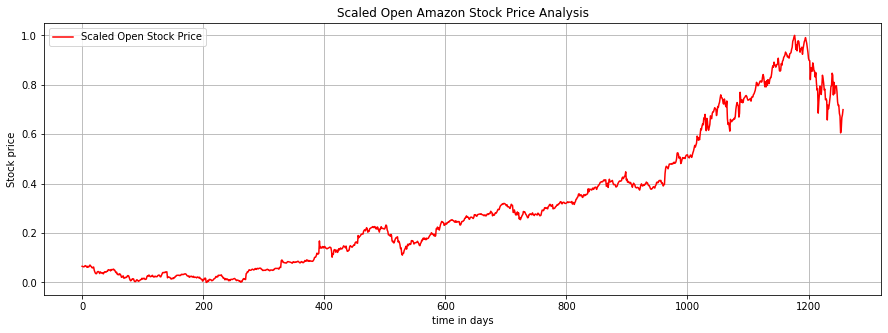

In [189]:
plt.figure(figsize = (15, 5))
plt.subplot(1,1,1)
plt.plot(train_scaled, color = "red", label = "Scaled Open Stock Price")
plt.title("Scaled Open Amazon Stock Price Analysis")
plt.xlabel("time in days")
plt.ylabel("Stock price")
plt.legend(loc = "best")
plt.grid(which = "major", axis = "both")

In [190]:
training_size = int(len(train_scaled) * 0.7) 
val_size = len(train_scaled) - training_size
print("length of training data = {}".format(training_size))
print("length of the hold out cross validation set = {}".format(val_size))

length of training data = 880
length of the hold out cross validation set = 378


In [191]:
train = train_scaled[0 : training_size]
val = train_scaled[training_size : len(train_scaled)]
print(train.shape)
print(val.shape)

(880, 1)
(378, 1)


In [192]:
time_step = 2
x_train, y_train = [], [] 
x_val, y_val = [], []
for i in range(time_step, train.shape[0]):
  x_train.append(train[i - time_step : i, 0])
  y_train.append(train[time_step, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

for i in range(time_step, val.shape[0]):
  x_val.append(val[i - time_step : i, 0])
  y_val.append(val[time_step, 0])
x_val, y_val = np.array(x_val), np.array(y_val)

print(x_train.shape, y_train.shape, type(x_train), type(y_train))
print(x_val.shape, y_val.shape, type(x_val), type(y_val))

(878, 2) (878,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(376, 2) (376,) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [193]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
y_train = y_train.reshape(y_train.shape[0], 1, 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], 1, 1)

print(x_train.shape, y_train.shape, type(x_train), type(y_train))
print(x_val.shape, y_val.shape, type(x_val), type(y_val))

(878, 2, 1) (878, 1, 1) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
(376, 2, 1) (376, 1, 1) <class 'numpy.ndarray'> <class 'numpy.ndarray'>
